In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
import numpy as np
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import json
import warnings
warnings.filterwarnings('ignore')

In [52]:
img_size=[224,224]

In [53]:
train_path="C:\\DL projects\\CNN_project_nail\\data\\train"
test_path="C:\\DL projects\\CNN_project_nail\\data\\validation"

In [54]:
vgg=VGG16(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [55]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(6,activation='softmax')(x)

In [58]:
model=Model(inputs=vgg.inputs,outputs=prediction)

In [59]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │       150,534 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,865,222 (56.71 MB)

 Trainable params: 150,534 (588.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                 )

In [63]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [64]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,shuffle=False,
                                               class_mode='categorical')

Found 3744 images belonging to 6 classes.


In [65]:
training_set.classes

array([0, 0, 0, ..., 5, 5, 5])

In [66]:
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=32,shuffle=False,
                                          class_mode='categorical')

Found 91 images belonging to 6 classes.


In [67]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5])

In [68]:
r=model.fit(training_set,validation_data=test_set,epochs=10,batch_size=32)

c:\Users\pmram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


c:\Users\pmram\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_82']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


117/117 ━━━━━━━━━━━━━━━━━━━━ 586s 5s/step - accuracy: 0.2119 - loss: 6.2278 - val_accuracy: 0.5714 - val_loss: 1.3105
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.5072 - loss: 2.3508 - val_accuracy: 0.6813 - val_loss: 1.1794
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 570s 5s/step - accuracy: 0.5341 - loss: 1.7356 - val_accuracy: 0.4066 - val_loss: 2.3331
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 669s 6s/step - accuracy: 0.4571 - loss: 2.3339 - val_accuracy: 0.6484 - val_loss: 1.4084
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 574s 5s/step - accuracy: 0.6190 - loss: 1.3879 - val_accuracy: 0.6264 - val_loss: 1.0683
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 567s 5s/step - accuracy: 0.5845 - loss: 1.7954 - val_accuracy: 0.6703 - val_loss: 1.3253
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.6262 - loss: 1.3827 - val_accuracy: 0.6154 - val_loss: 1.0820
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 567s 5s/step - accuracy: 0.6946 - loss: 1.1341 - val_accuracy: 0.417

In [70]:
r.history

{'accuracy': [0.2895299196243286,
  0.4746260643005371,
  0.5018696784973145,
  0.5109508633613586,
  0.5750533938407898,
  0.6180555820465088,
  0.5974892973899841,
  0.6786859035491943,
  0.5996260643005371,
  0.651442289352417],
 'loss': [4.226291656494141,
  2.320504903793335,
  2.0914623737335205,
  2.040532112121582,
  1.783076286315918,
  1.6573810577392578,
  1.5457994937896729,
  1.1945254802703857,
  1.9161267280578613,
  1.3266322612762451],
 'val_accuracy': [0.5714285969734192,
  0.6813187003135681,
  0.4065934121608734,
  0.6483516693115234,
  0.6263736486434937,
  0.6703296899795532,
  0.6153846383094788,
  0.4175824224948883,
  0.5274725556373596,
  0.7362637519836426],
 'val_loss': [1.3104565143585205,
  1.1794339418411255,
  2.333104133605957,
  1.4083961248397827,
  1.0683261156082153,
  1.3252942562103271,
  1.0819568634033203,
  3.268932580947876,
  2.500188112258911,
  0.9111567735671997]}

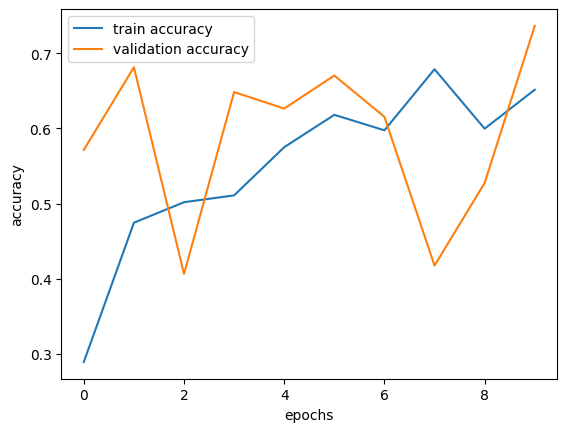

In [71]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label="train accuracy")
plt.plot(r.history['val_accuracy'],label="validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

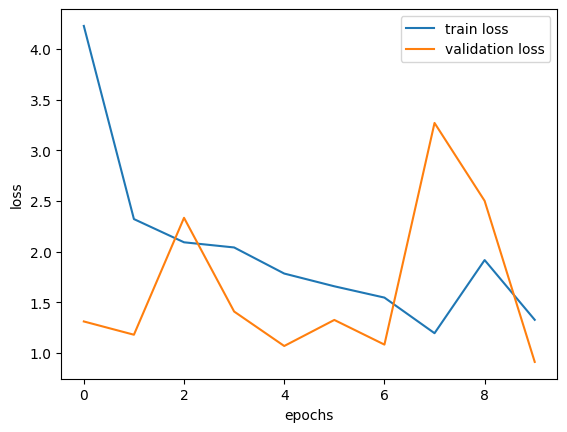

In [76]:

plt.plot(r.history['loss'],label="train loss")
plt.plot(r.history['val_loss'],label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [83]:
def load_and_preprocess_image(image_path,target_size=(224,224)):
    img=Image.open(image_path)
    img=img.resize(target_size)
    img_array=np.array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=img_array.astype('float32')/255
    return img_array



In [84]:
def predict_image_class(model,image_path,class_indices):
    preprocessed_img=load_and_preprocess_image(image_path)
    predictions=model.predict(preprocessed_img)
    predicted_class_index=np.argmax(predictions,axis=1)[0]
    predicted_class_name=class_indices[predicted_class_index]
    return predicted_class_name

In [85]:
class_indices={v: k for k,v in training_set.class_indices.items()}

In [86]:
class_indices

{0: 'Acral_Lentiginous_Melanoma',
 1: 'Healthy_Nail',
 2: 'Onychogryphosis',
 3: 'blue_finger',
 4: 'clubbing',
 5: 'pitting'}

In [91]:
image_path='C:\\DL projects\\CNN_project_nail\\data\\train\\pitting\\3_JPG.rf.6993e87580041e689dc32caa0ec4b94d.jpg'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
pitting


In [90]:
model.save('nail_model.h5')

In [ ]:

json.dump(class_indices,open('class_indices.json','w'))